# Data Visualization: Implementation of treemaps in R and Python
#### Author: Alexander Ullmann

## Outline
1. Introduction to treemaps
2. Quality of Life Categorical Data
3. Implementation in R
4. (Implementation in SAS)
5. Implementation in Python
6. Comparison of different implementation methods
7. Exercises

## 1. Introduction to treemaps
In information visualization and computing, treemapping is a method for displaying hierarchical data using nested figures, usually rectangles. The rectangles represent areas proportional to specified dimensions of the data. Often the leaf nodes are colored to show a separate dimension of the data. [source: wikipedia/Treemapping](https://en.wikipedia.org/wiki/Treemapping). 
<br>
<br>
In this tutorial we want to show you how to build treemaps in `R` and `Python`. We will be using data from a questionnaire regarding the satisfaction with quality of life. Similar kind of data is often found in clinical research where focus on life quality and satisfaction after a medical procedure or medication regime is of interest.
<br>
***
The basic idea of our approach is to give an efficient visual overview of the data. The aim is to provide a first comprehensive look at the distribution of an outcome variable in this case a pseudo-continuous (on Likert-Scale) over different subgroup variables which are categorical in nature. From there a more sophisticated analysis could be made for example with regression models and alike.
***

## 2. Quality of Life Categorical Data

The data which we will use is provided by GESIS - Leibniz-Institut für Sozialwissenschaften (2016): German General Social Survey - ALLBUS 2014. GESIS Datenarchiv, Köln. ZA5242 Datenfile Version 1.0.0, http://dx.doi.org/10.4232/1.12437. This data set was put online by the PSI Organisation within the [Wonderful Wednesdays Workshops](https://www.psiweb.org/sigs-special-interest-groups/visualisation/welcome-to-wonderful-wednesdays). This data is publicly available and made free for usage in their [github repository](https://github.com/VIS-SIG/Wonderful-Wednesdays/tree/master/data/2020/2020-05-13) under the CC0 1.0 Universal license. 
<br>
<br>

The primary end point was overall satisfaction with life.
<br>
<br>

### Question to participants was:
* How would you rate your satisfaction with your life overall on a scale from 0-10? (10=completely satisfied)
<br>
<br>

### Categorical variables that were also collected:
* Age
* BMI
* Working hours
* Doctor visits per year
* Net income
* Smoker
* Gender
* Employment status
* Graduation
* Graduation of father
* Graduation of mother
* Highest educational grade (f=father/m=mother)
<br>
<br>

### Aim: What are the most relevant factors for quality of life/satisfaction in life? 
We want to provide a first graphical overview for the data that might facilitate a further analysis to answer this question. A deep dive into statistical modeling of the data is not intended to be part of this tutorial. 

## 3. Implementation in R
There are several possibilities to make treemap-plots in R. Here is a list of packages that might allow you to easily implement these plots (not necessarily a complete list of all the packages):

* library(treemap)
* library(d3treeR) -> adds mouse over effects/interactivity
* library(plotly) -> interactive treemaps
* library(highcharter)
* *library(ggplot2)*
* *library(treemapify)*
* base R (basicly your own implementation from scratch)
<br>
<br>


***
We will focus on a `ggplot2` implementation plus the additional `treemapify` package as ggplot is widely used to produce graphics for R nowadays. Feel free to try out the other packages and see what fits your needs best. For the R-code to work you need to set up your jupyter notebook with an R kernel and activate it. An alternative is to paste the code in a R-IDE like R-Studio.
***

### Load the packages


In [1]:
if (!require('ggplot2')) install.packages('treemapify');
if (!require('treemapify')) install.packages('treemapify');
if (!require('dplyr')) install.packages('dplyr');
if (!require('RColorBrewer')) install.packages('RColorBrewer');
if (!require('repr')) install.packages('repr');
if (!require('IRdisplay')) install.packages('IRdisplay');
# used for graphics
library(ggplot2)
# used to add treemaps to ggplot graphics
library(treemapify)
# used for data manipulation
library(dplyr)
# used for colors
library(RColorBrewer)
# managing output devices
library(repr)
# manage image outout to jupyter notebook
library(IRdisplay)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Loading required package: treemapify

Warning message:
"package 'treemapify' was built under R version 3.6.3"
Loading required package: dplyr

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: RColorBrewer

Loading required package: repr

Warning message:
"package 'repr' was built under R version 3.6.3"
Loading required package: IRdisplay

Warning message:
"package 'IRdisplay' was built under R version 3.6.3"


### Read the data + Data wrangling

In [2]:
# read data directly from the github
data <- read.csv(url('https://raw.githubusercontent.com/VIS-SIG/Wonderful-Wednesdays/master/data/2020/2020-05-13/Satisfaction_wW2005.csv'), na.strings = c(".", ""), header = TRUE)
# show the first 10 observations
head(data, 10)
# show the structure of the data
str(data)

,X,ID,age,bmi,w_hours,todoctor,income,smoker,gender,employed,graduat,graduat_f,graduat_m,high_grad,high_grad_f,high_grad_m,satisfaction
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,1359,>40,>30,NA,<6 visits,<1000,Y,female,non-working,secondary school,secondary school,university entrance,apprenticeship,industrial/agric. teaching,master craftman,10
2,2,2455,>40,<=30,<35h,<6 visits,<1000,N,female,regular half-time,secondary school,elementary school,elementary school,apprenticeship,master craftman,commercial teaching,9
3,3,200,30-40,>30,NA,<6 visits,NA,N,male,non-working,university entrance,university entrance,university entrance,university degree,university degree,university degree,8
4,4,1280,>40,<=30,>45h,<6 visits,NA,N,male,regular full-time,tech.college entrance qual.,secondary school,secondary school,tech.college degree,commercial teaching,commercial teaching,8
5,5,2384,<30,<=30,NA,<6 visits,NA,N,female,non-working,NA,secondary school,elementary school,NA,industrial/agric. teaching,industrial/agric. teaching,7
6,6,2258,<30,<=30,<35h,<6 visits,NA,N,male,regular half-time,tech.college entrance qual.,NA,NA,no degree,NA,NA,9
7,7,837,>40,<=30,>45h,<6 visits,>=3000,N,male,regular full-time,NA,elementary school,elementary school,master craftman,industrial/agric. teaching,no degree,8
8,8,1343,<30,<=30,NA,<6 visits,<1000,N,male,part-time job,elementary school,no degree,no degree,no degree,no degree,commercial teaching,9
9,9,3129,>40,<=30,35-45h,<6 visits,1000- <2000,N,male,regular full-time,elementary school,elementary school,elementary school,apprenticeship,industrial/agric. teaching,commercial teaching,8


'data.frame':	3466 obs. of  17 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ID          : int  1359 2455 200 1280 2384 2258 837 1343 3129 2961 ...
 $ age         : Factor w/ 3 levels "<30",">40","30-40": 2 2 3 2 1 1 2 1 2 2 ...
 $ bmi         : Factor w/ 2 levels "<=30",">30": 2 1 2 1 1 1 1 1 1 2 ...
 $ w_hours     : Factor w/ 3 levels "<35h",">45h",..: NA 1 NA 2 NA 1 2 NA 3 1 ...
 $ todoctor    : Factor w/ 3 levels "<6 visits",">10 visits",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ income      : Factor w/ 4 levels "<1000",">=3000",..: 1 1 NA NA NA NA 2 1 3 4 ...
 $ smoker      : Factor w/ 2 levels "N","Y": 2 1 1 1 1 1 1 1 1 1 ...
 $ gender      : Factor w/ 2 levels "female","male": 1 1 2 2 1 2 2 2 2 1 ...
 $ employed    : Factor w/ 4 levels "non-working",..: 1 4 1 3 1 4 3 2 3 4 ...
 $ graduat     : Factor w/ 5 levels "elementary school",..: 3 3 5 4 NA 4 NA 1 1 4 ...
 $ graduat_f   : Factor w/ 5 levels "elementary school",..: 3 1 5 3 3 NA 1 2 1 1 ...
 $ graduat_m   : Factor w/ 5 le

In the following we do some data manipulation steps to summarize
the categorical variables and calculate the mean of the 
outcome variable `satisfaction` for the different subgroups.

As an example we show how to summarize the information for the categorical variable: `age`. 
Then we write a function which performs the same task for all the subgroups.
We use the pipe notation from the `dplyr` package.

In [3]:
d_age<- data %>%
        filter(!is.na(satisfaction)) %>% # remove missings from outcome variable
        group_by(age) %>% # group by categories within the variable age
        summarize(n = n(), 
                  mean_satisfaction = mean(satisfaction)) %>% # get N' and mean of satisfaction for each category in age
        mutate(percent = n / sum(n)*100) %>% # calculate relative frequency
        mutate(group = "Age") %>% # give the category a label
        rename(Variable = names(.)[1]) # rename the first column as "Variable"
print(d_age)

Warning message:
"Factor `age` contains implicit NA, consider using `forcats::fct_explicit_na`"


# A tibble: 4 x 5
  Variable     n mean_satisfaction percent group
  <fct>    <int>             <dbl>   <dbl> <chr>
1 <30        401              7.61 11.6    Age  
2 >40       2458              7.51 70.9    Age  
3 30-40      604              7.70 17.4    Age  
4 NA           3              7     0.0866 Age  


Note that the warning "Factor `age` contains implicit NA, consider using `forcats::fct_explicit_na` 
is not of a big issue as it only makes us aware that the variable age has missings.

Printing the results data set will show you that we calculated 
the mean of satisfaction over the distinct categorical values of `age` as well for `NA`'s (missings) which are present in `age`. That means that participants who didn't answer the question regarding age
still answered the main question.

#### Now let's fit the previous data manipulation steps in a function so we can apply it to all subgroups.

In [4]:
foo_summarize<- function(dat = data, my_var = NULL, group_label = "NA"){
   suppressWarnings(
     ans<- dat %>%
        filter(!is.na(satisfaction)) %>%
        group_by({{my_var}}) %>%
        summarize(n = n(), 
                  mean_satisfaction = mean(satisfaction)) %>%
        mutate(percent = n / sum(n)*100) %>%
        mutate(group = group_label) %>%
        rename(Variable = names(.)[1])
   )
  
   return(ans)
}
# Note that we suppress the warning about the missings as we want them in our results

In [5]:
# calculate statistics for all the subgroups
d_age<- foo_summarize(dat=data, my_var=age, group_label = "Age")
d_bmi<- foo_summarize(dat=data, my_var=bmi, group_label = "BMI")
d_w_hours<- foo_summarize(dat=data, my_var=w_hours, group_label = "Working hours")
d_todoctor<- foo_summarize(dat=data, my_var=todoctor, group_label = "Doctor visits per year")
d_income<- foo_summarize(dat=data, my_var=income, group_label = "Net income")
d_smoker<- foo_summarize(dat=data, my_var=smoker, group_label = "Smoker")
d_gender<- foo_summarize(dat=data, my_var=gender, group_label = "Gender")
d_employed<- foo_summarize(dat=data, my_var=employed, group_label = "Employment status")
d_graduat<- foo_summarize(dat=data, my_var=graduat, group_label = "Graduation")
d_graduat_f<- foo_summarize(dat=data, my_var=graduat_f, group_label = "Graduation of father")
d_graduat_m<- foo_summarize(dat=data, my_var=graduat_m, group_label = "Graduation of mother")
d_high_grad<- foo_summarize(dat=data, my_var=high_grad, group_label = "Highest educational grade")
d_high_grad_f<- foo_summarize(dat=data, my_var=high_grad_f, group_label = "Highest educational grade (father)")
d_high_grad_m<- foo_summarize(dat=data, my_var=high_grad_m, group_label = "Highest educational grade (mother)")

#combine all the results in one data set
d_all<- do.call(rbind, list(d_age, d_bmi, d_w_hours, d_todoctor, d_income, d_smoker, d_gender, d_employed, d_graduat,
                            d_graduat_f, d_graduat_m, d_high_grad, d_high_grad_f, d_high_grad_m))
# print data
print(d_all)

# A tibble: 71 x 5
   Variable     n mean_satisfaction percent group        
   <fct>    <int>             <dbl>   <dbl> <chr>        
 1 <30        401              7.61 11.6    Age          
 2 >40       2458              7.51 70.9    Age          
 3 30-40      604              7.70 17.4    Age          
 4 NA           3              7     0.0866 Age          
 5 <=30      2784              7.56 80.3    BMI          
 6 >30        635              7.54 18.3    BMI          
 7 NA          47              7.40  1.36   BMI          
 8 <35h       387              7.70 11.2    Working hours
 9 >45h       398              7.58 11.5    Working hours
10 35-45h    1133              7.71 32.7    Working hours
# ... with 61 more rows


In [6]:
# We will rename the NA's as "Missing" because it looks better in the plot,
# before that we make sure that we turn the factors to character,
# else we can't make changes to the variable.
d_all$Variable<- as.character(d_all$Variable)
d_all$Variable[which(is.na(d_all$Variable))]<- "Missing"

# create descrete response variable to display colors in the plot better
d_all$satisfation_categories<- cut(d_all$mean_satisfaction, 
                                   breaks=seq(round(min(d_all$mean_satisfaction)), round(max(d_all$mean_satisfaction)), 0.5), 
                                   labels=c("(6,6.5]", "(6.5,7]", "(7,7.5]", "(7.5,8]", "(8,8-5]", "(8.5-9]"), right = TRUE)
# create response with label
d_all$satisfaction_lab<- paste(d_all$Variable, " (", round(d_all$mean_satisfaction, 1), ")", sep = "")
# colors for plot
palette<- brewer.pal(n = 6, name = 'RdYlBu')

### Making the plot
First we want to make a basic treemap plot and then finish it up by making it pretty

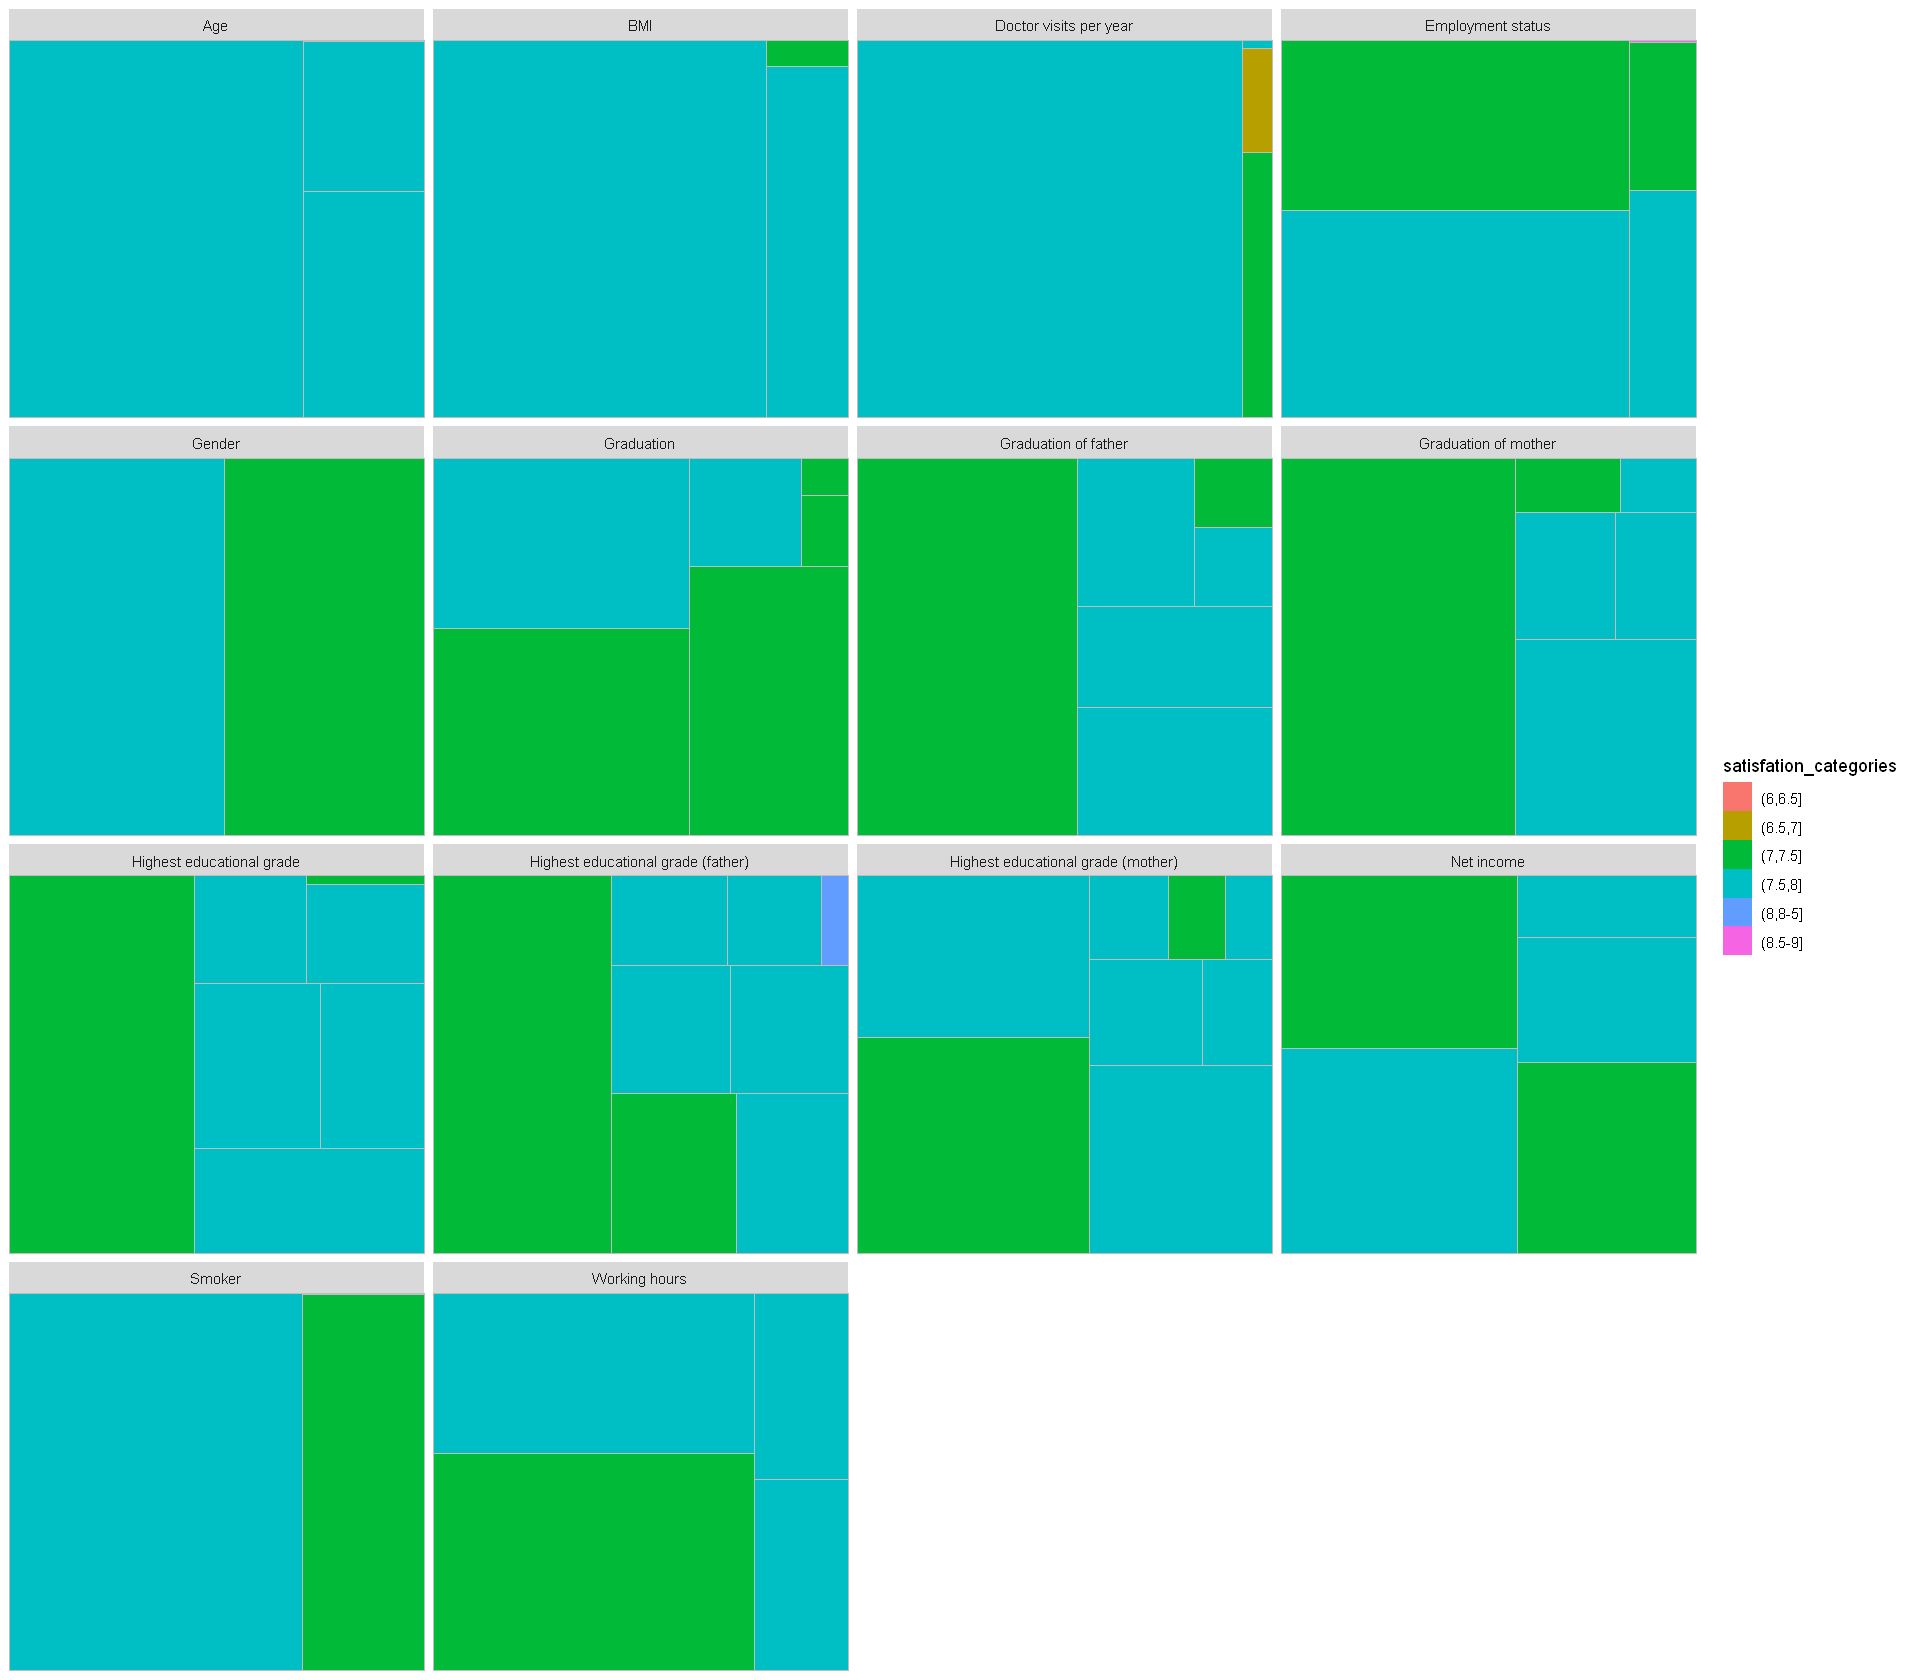

In [7]:
# width and height of output window in jupyter
options(repr.plot.width=16, repr.plot.height=14) 
g1<- ggplot(d_all, aes(area=percent, label = Variable, fill = satisfation_categories, subgroup = group)) + 
        geom_treemap() + # makes the treemap
        facet_wrap( ~ group) # adds the subgroups
g1

As you can see the above 3 lines of code produce an image output. But there are several issues with this basic treeplot that need to be addressed:
* the labels on the tiles are missing
* the colors are not really appealing and suitable for this plot
* the label on the legend has to be adjusted
* title and context information is missing
* the text describing the subgroups is too small

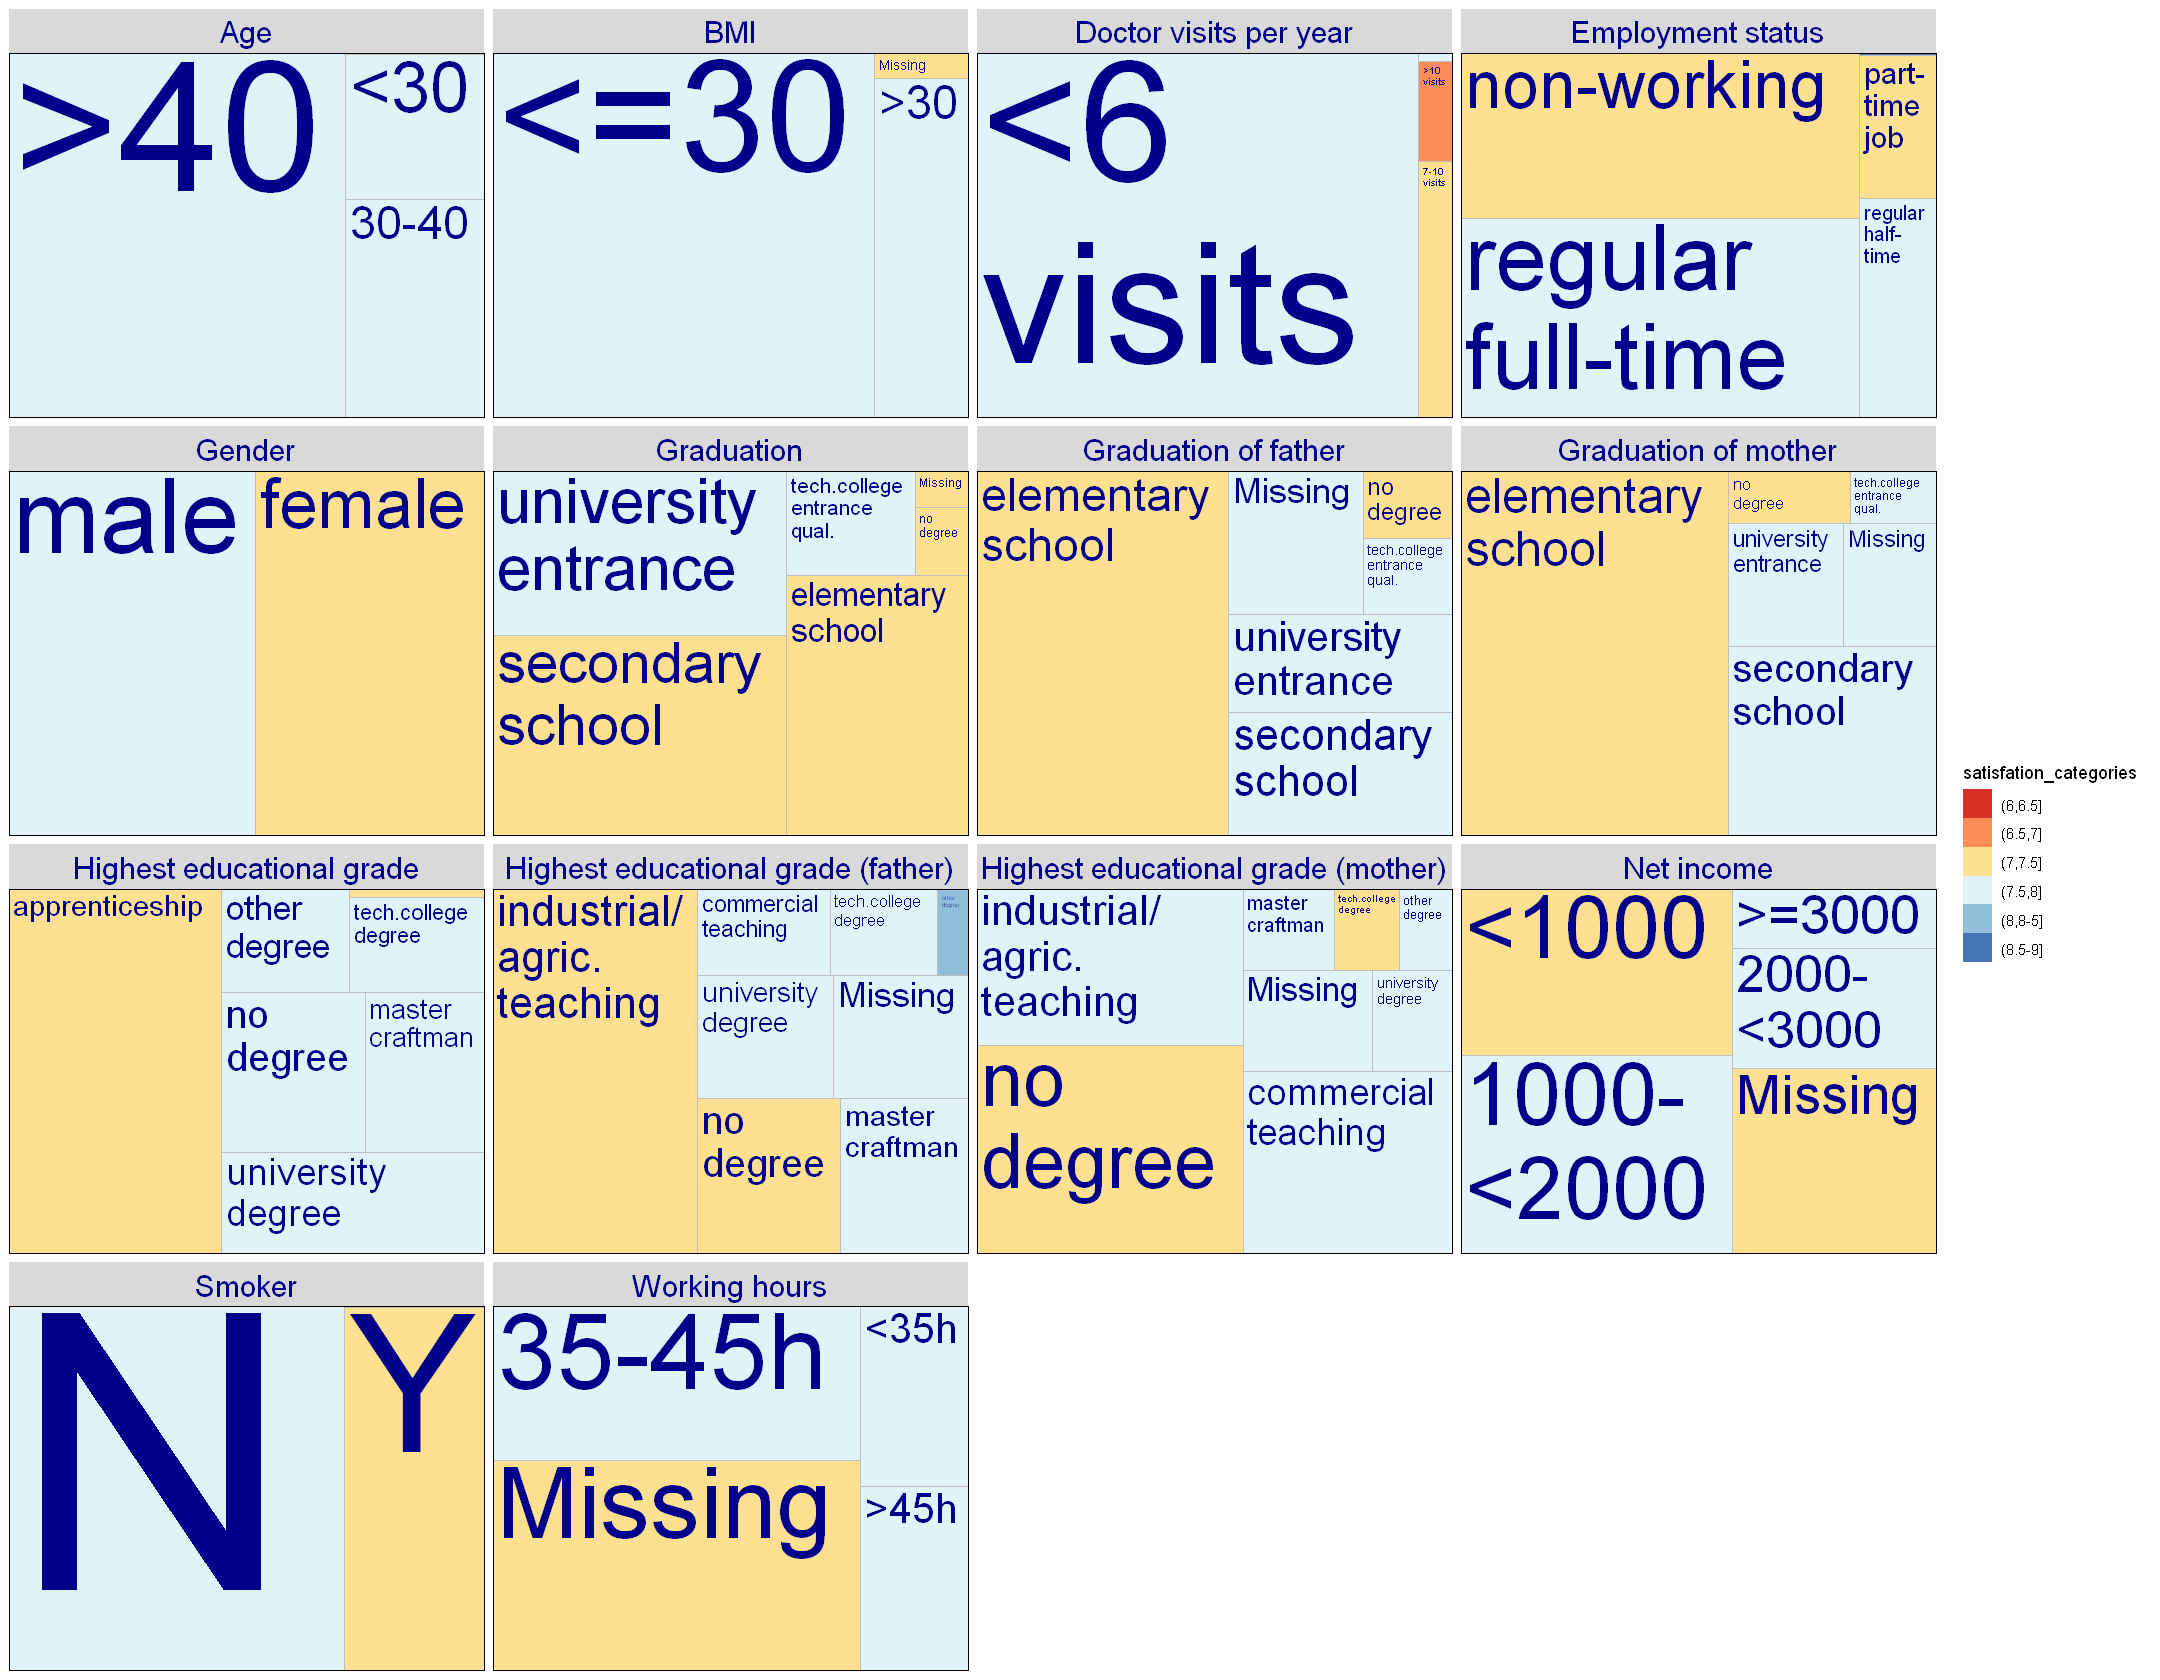

In [9]:
options(repr.plot.width=18, repr.plot.height=14) 

g2<- ggplot(d_all, aes(area=percent, label = Variable, fill = satisfation_categories, subgroup = group)) + 
        geom_treemap() + # makes the treemap 
        geom_treemap_subgroup_border(size = 1.5, color = "black") + # changing the border color
        geom_treemap_text(grow = T, reflow = T, place = "topleft", layout = "scol", min.size = 1,
                          color = "Darkblue", size = 8) + # putting text on the tiles, make the text adjust to the size of the tiles automatically
        scale_fill_manual(values = palette) + # add the custom colors              
        facet_wrap( ~ group) + # wrap display by subgroup
        theme(strip.text.x = element_text(size = 18, colour = "Darkblue")) # make subgroup text bigger

g2

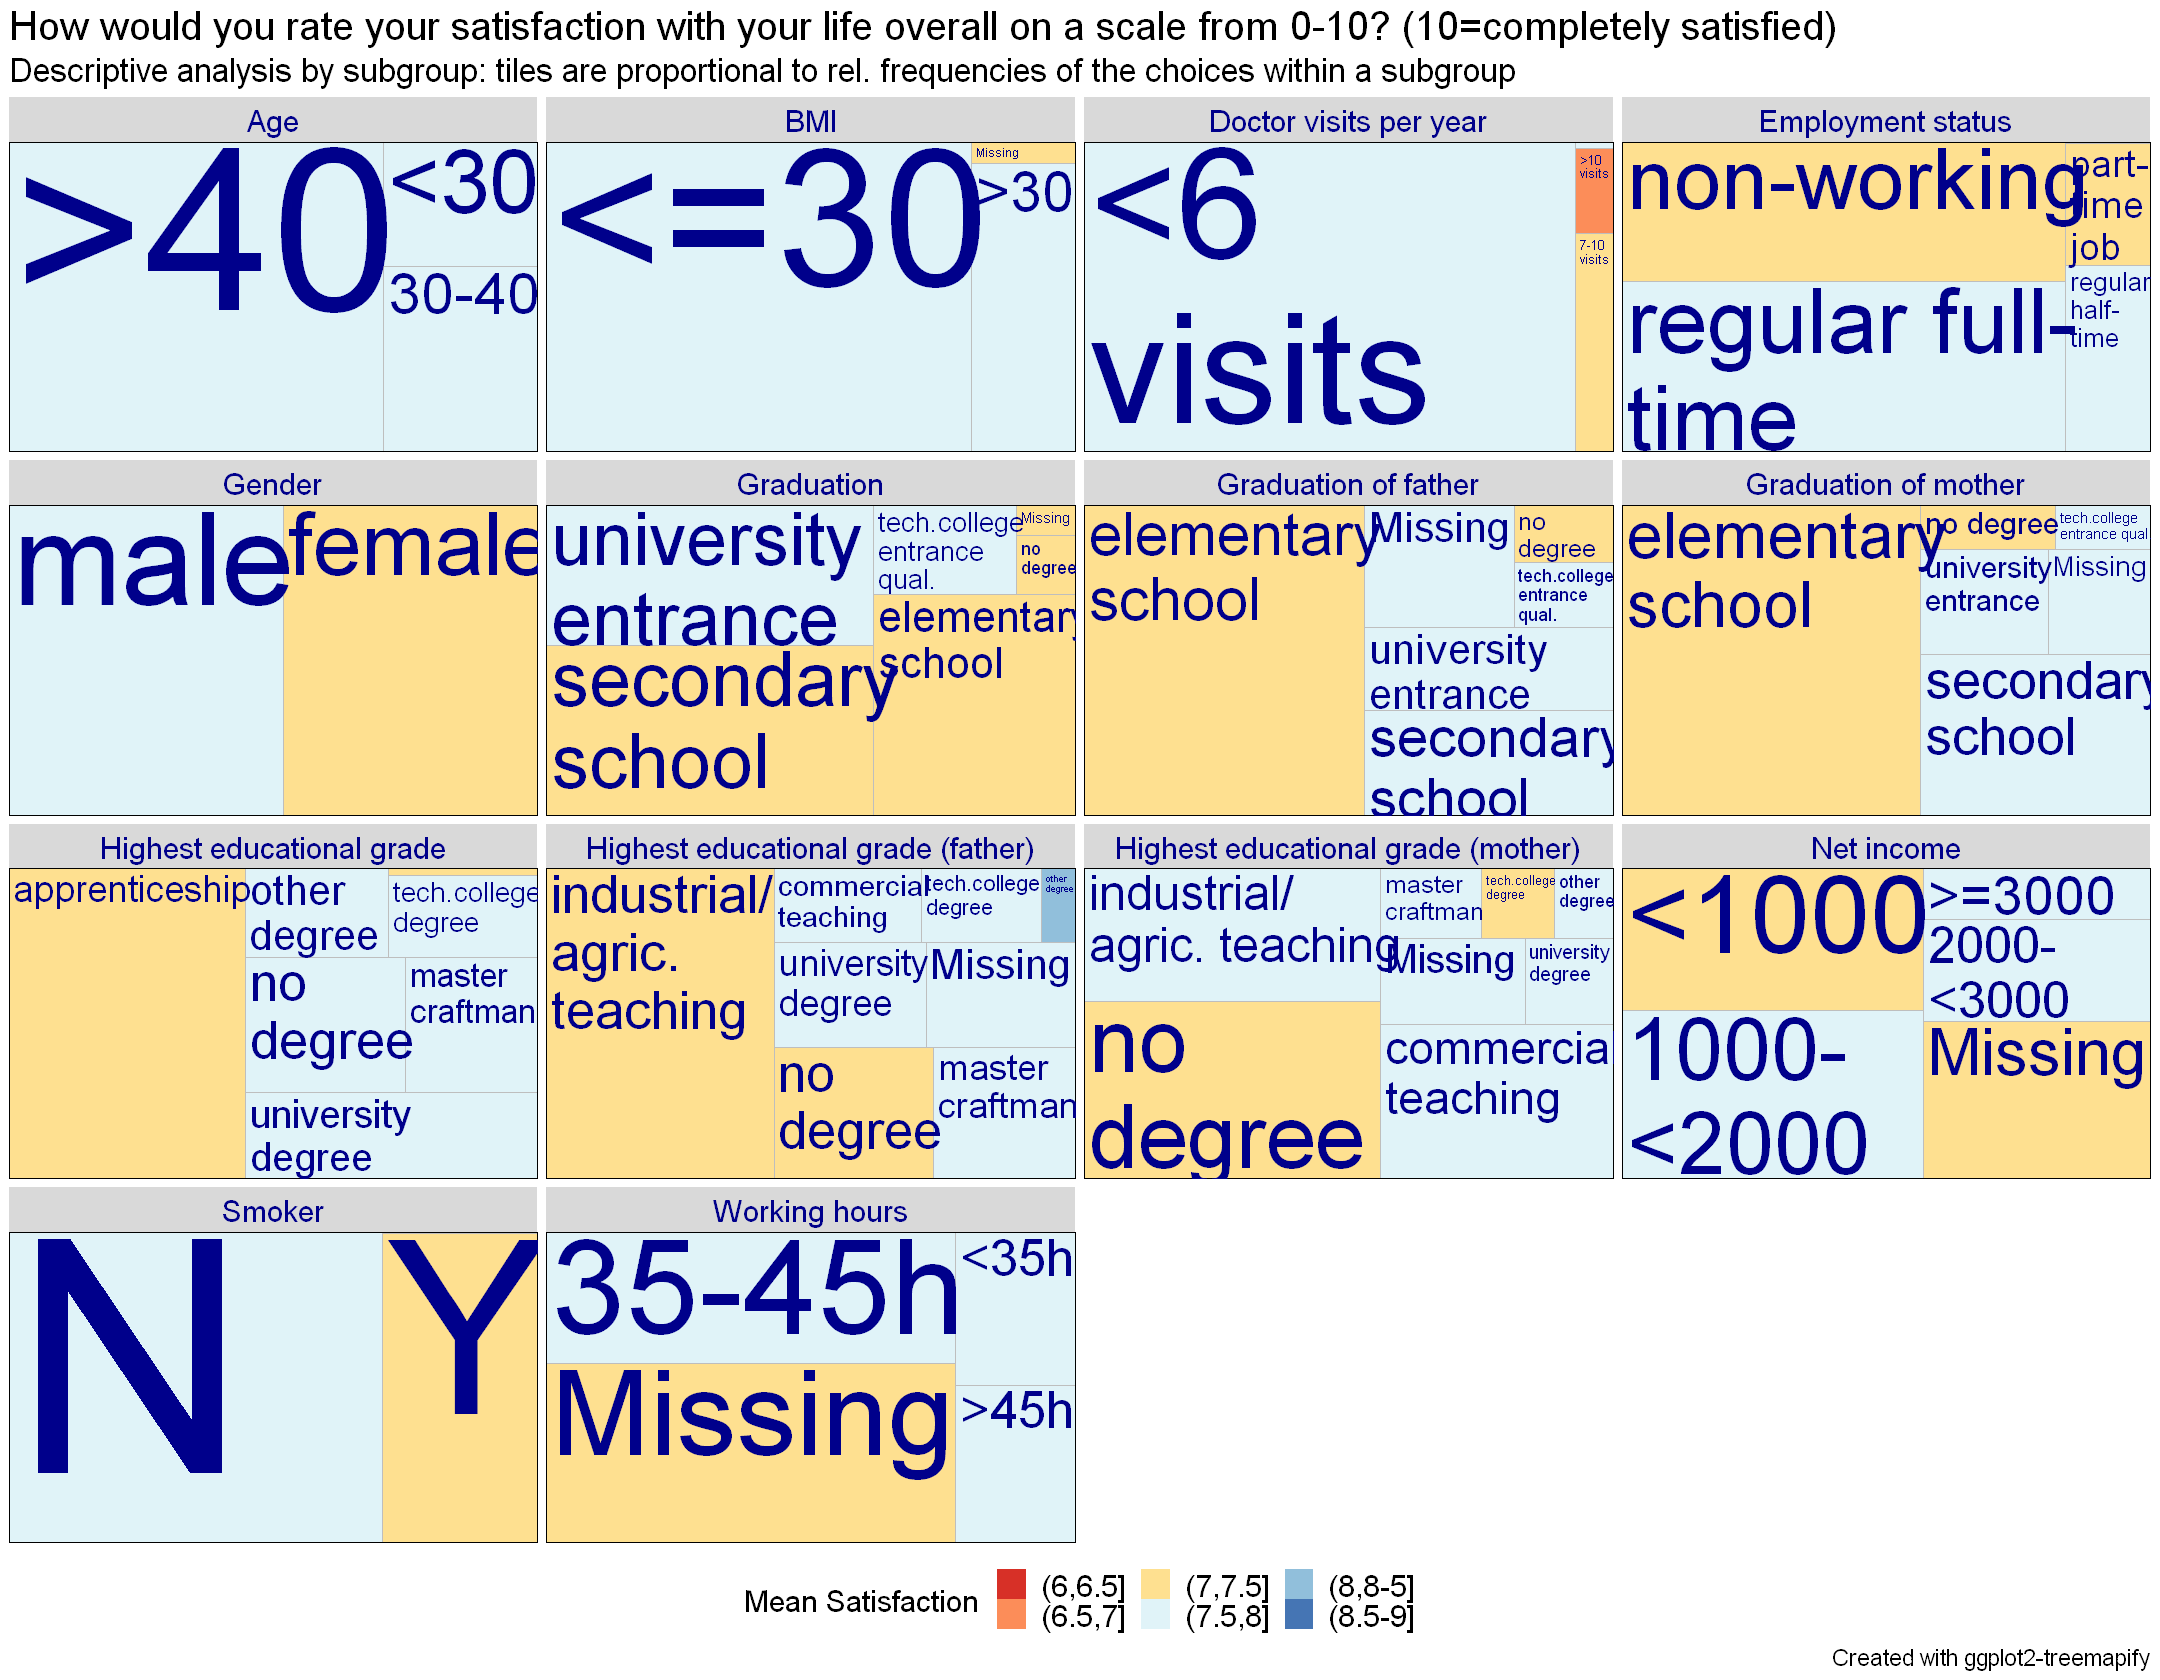

In [26]:
# finally we add some titles and labels to make the plot more accessible and self explaining
options(repr.plot.width=18, repr.plot.height=14) 
g3<- ggplot(d_all, aes(area=percent, label = Variable, fill = satisfation_categories, subgroup = group)) + 
            geom_treemap() + 
            geom_treemap_subgroup_border(size = 1.5, color = "black") +
            geom_treemap_text(grow = T, reflow = T, place = "topleft", layout = "scol", min.size = 1,
                              color = "Darkblue", size = 10) +
            scale_fill_manual(values = palette) + 
            facet_wrap( ~ group) + 
            theme(legend.position = "bottom", 
                  legend.text = element_text(color="black", size = 18), 
                  legend.title = element_text(size = 18),
                  plot.title = element_text(size = 24),
                  plot.subtitle = element_text(size = 20), 
                  plot.caption = element_text(size = 14),
                  strip.text.x = element_text(size = 18, colour = "Darkblue"))+ # make subgroup text bigger
            labs(title = 'How would you rate your satisfaction with your life overall on a scale from 0-10? (10=completely satisfied)',
                 subtitle = 'Descriptive analysis by subgroup: tiles are proportional to rel. frequencies of the choices within a subgroup',
                 caption ="Created with ggplot2-treemapify",
                 fill = "Mean Satisfaction")

g3

#### Explanation to the plot:
So what does the plot tell us.
* The tiles represent the different subgroups. The distribution of the values within a subgroup is proportional to the size of the tiles. For example there are more non-smokers as smokers. The distribution of males and females is even. Most of the participants are over the age of 40. And so on. You also see the proportion of missing data for each subgroup.
* You can approximately deduct the mean of the satisfaction for the different sub-categories. For example participant who have more then 10 doctor visits per year are less satisfied. Non-smokers have a slightly higher satisfaction score then smokers. From a first overview you might also see that the mean variability of satisfaction over the categories is small and tends to be in the upper range.
* Such an overview-plot may get you started with the process of understanding the data and give you ideas on how to progress on further analyses.
<br>
<br>
Issues with such an plot could be names as: 
* The text on the tiles is not always quite readable because it gets too small. The text is not always fitting on the tiles. Here one could try out the other packages that produce treemaps and see if they handle these issues better. You could also dive deeper into the ggplot2 options and explore them.
* Working in jupyter notebook and making the plot fit to the dimensions of the output window, makes most of the text unreadable. You could save the image to your hard disk drive with higher dimensions and look at it in fullscreen mode. Also producing that plot in RStudio and resizing the window to fullscreen would yield better visual representation. 
* You could go one step further and use this kind of plots in Rshiny to add mouse-over effects for the tiles displaying the actual percentages or satisfaction means. Also make sure to look at the `d3treeR+treemap` or `plotly` package if interactivity is desired.


## 4. (Implementation in SAS)
When it comes to SAS and treemaps there is no easy to use solution in SAS® Base. But there is the possibility to work with [SAS Visual Analytics](https://documentation.sas.com/?docsetId=vaobj&docsetTarget=p0cvtwmyn64desn1w721b6u8tzur.htm&docsetVersion=8.1&locale=en) and create treemaps with that. Note that this software comes with a price and may therefore be not easily accessible throughout the departments at your company and in your private work environment.


## 5. Implementation in Python
For the following code to work you should switch your Jupyter Kernel from `R` to `Python`. We are using `Python 3`.

You can use Anaconda Navigator to install packages for your environment. Make sure that your kernel/python environment has the packages installed. Alternatively use the anaconda prompt to install packages like this: 
* activate the environment (for example if your environment for the Python Kernel is named "my_python_env"): conda activate my_python_env.
* pip install pandas
* pip install matplotlib
* pip install plotly

### Load the packages

In [1]:
# load the packages
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
%matplotlib inline

#### Make more space for your plots, so you don't have a box with a scroll bar.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

### Read the data + Data wrangling

In [4]:
# read the data
my_data = pd.read_csv("https://raw.githubusercontent.com/VIS-SIG/Wonderful-Wednesdays/master/data/2020/2020-05-13/Satisfaction_wW2005.csv")

# handle missings
my_data = my_data.fillna("missing")
my_data = my_data.replace(to_replace = ".", value = "missing")
my_data.head()

,Unnamed: 0,ID,age,bmi,w_hours,todoctor,income,smoker,gender,employed,graduat,graduat_f,graduat_m,high_grad,high_grad_f,high_grad_m,satisfaction
0,1,1359,>40,>30,missing,<6 visits,<1000,Y,female,non-working,secondary school,secondary school,university entrance,apprenticeship,industrial/agric. teaching,master craftman,10
1,2,2455,>40,<=30,<35h,<6 visits,<1000,N,female,regular half-time,secondary school,elementary school,elementary school,apprenticeship,master craftman,commercial teaching,9
2,3,200,30-40,>30,missing,<6 visits,missing,N,male,non-working,university entrance,university entrance,university entrance,university degree,university degree,university degree,8
3,4,1280,>40,<=30,>45h,<6 visits,missing,N,male,regular full-time,tech.college entrance qual.,secondary school,secondary school,tech.college degree,commercial teaching,commercial teaching,8
4,5,2384,<30,<=30,missing,<6 visits,missing,N,female,non-working,missing,secondary school,elementary school,missing,industrial/agric. teaching,industrial/agric. teaching,7


We want to use a simple and basic approach to manipulate the data
as close to the R - code above as possible.  
The interested reader is encouraged to implement a more elegant way.

Define a function to calculate the `n`, `percent` and `mean` of satisfaction for a subgroup.

In [5]:
def summarizing(data, variables, labels, response, stat = "mean"):
    df_results = pd.DataFrame() # empty dataframe to store end results
    
    for i in range(len(variables)):
        df_var = data.groupby([variables[i]]).size() # get counts
        df_percent = df_var/df_var.sum() # calc percentages
        group_values = df_percent.axes[0].tolist() # capture the group levels
        df_mean = data.groupby([variables[i]]).agg({response: stat}) # calculate mean  
        df_temp = pd.concat([df_var, df_percent, df_mean], axis = 1).reset_index(drop=True) # column bind the data and remove the header column
        df_temp["labels"] = labels[i] # assign labels 
        df_temp["group"] = group_values # assign group levels
        df_results = pd.concat([df_temp, df_results]) # row bind the data to get end results
        
    return df_results

In [6]:
#apply the function to one subgroup to test it
d_test = summarizing(data=my_data, 
                 variables=["age", "bmi"],
                 labels=["Age", "BMI"],
                 response="satisfaction",
                 stat="mean")

# rename columns
d_test.columns = ["N", "Percentage", "Mean of satisfaction", "Labels", "Group"] 
d_test.head()

,N,Percentage,Mean of satisfaction,Labels,Group
0,2784,0.803231,7.562141,BMI,<=30
1,635,0.183208,7.538583,BMI,>30
2,47,0.013560,7.404255,BMI,missing
0,604,0.174264,7.698675,Age,30-40
1,401,0.115695,7.613466,Age,<30


In [7]:
# create the data that we need to plotting, use all the variables that we have.
d1 = summarizing(data=my_data, 
                 variables=["age", "bmi", "w_hours", "todoctor", "income", "smoker", "gender", "employed",
                           "graduat", "graduat_f", "graduat_m", "high_grad", "high_grad_f",
                            "high_grad_m"],
                 labels=["Age", "BMI", "Working hours", "Doctor visits per year","Net income", "Smoker", "Gender", "Employment status",
                        "Graduation", "Graduation of father", "Graduation of mother", "Highest edu. grade", "Highest edu. grade (father)",
                         "Highest educational grade (mother)"],
                 response="satisfaction",
                 stat="mean")

# assign proper labels
d1.columns = ["N", "Percentage", "Mean of satisfaction", "Labels", "Group"]
# round numbers
d1 = d1.round(3) 
d1.head(10)

,N,Percentage,Mean of satisfaction,Labels,Group
0,760,0.219,7.655,Highest educational grade (mother),commercial teaching
1,832,0.240,7.540,Highest educational grade (mother),industrial/agric. teaching
2,148,0.043,7.703,Highest educational grade (mother),master craftman
3,264,0.076,7.583,Highest educational grade (mother),missing
4,1109,0.320,7.429,Highest educational grade (mother),no degree
5,86,0.025,7.535,Highest educational grade (mother),other degree
6,106,0.031,7.425,Highest educational grade (mother),tech.college degree
7,161,0.046,7.957,Highest educational grade (mother),university degree
0,231,0.067,7.593,Highest edu. grade (father),commercial teaching
1,1491,0.430,7.436,Highest edu. grade (father),industrial/agric. teaching


### Making the plot
We will use the plotly module in python to create an interactive plot.

In [20]:
fig = px.treemap(d1,
                 path=['Labels', 'Group'], # nesting structure: First "Labels" then values within the Labels group as "Group"
                 color='Mean of satisfaction', # Variable for coloring the tiles
                 values='Percentage', # this is the variable that controls the partitioning of the tiles,
                                      # we want the tiles to be propotional to "Percentage"
                 color_continuous_scale='RdYlBu' # color palette             
                 )

# save title as string variable
my_title = ("How would you rate your satisfaction with your life overall on a scale from 0-10? (10=completely satisfied)." +
            "<br>Descriptive analysis by subgroup: tiles are proportional to rel. frequencies of the choices within a subgroup")
            
# update to show the title
fig.update_layout(title=my_title, width=1000, height=800)
# show the figure
fig.show()

The above plot is interactive. We have the ability to zoom into the subgroups. The zoom ability allows us to better see the smaller text. The plot also allows for mouse over effects. Here we get the numbers on the percentages for the categorical variables and the mean of the outcome variable for every subgroup. We observe that graduation grade, non-smoker, being healthy (few doctor's visits per year) correlate positively with satisfaction. The treemap approach to the data that we have demonstrated here is only one possible suggestion of many. Feel free to further explore the data set with other statistical methods. For example one could use regression modeling to look at the variables that contribute to the outcome `satisfaction` the most or use other visual tools like boxplots to capture variability.

## 6. Comparison of different implementation methods
In this Jupyter tutorial we showed how to create efficient overview graphics for questionnaire data about quality of life. We used the `ggplot2` approach in `R` and the `plotly` module in `python`. The advantage of using `plotly` is that it easily incorporates mouse over effects for the tiles. Additionally one can zoom into the subgroups and have therefore a better view on the proportions and text labels of the tiles. Please note that the `plotly` package is also available for the `R` Programming Language. We intentionally showed two different approaches. An interactive graphic is also achievable with `R`. But we noticed that producing an interactive plot in `R` with `plotly` is a bit more advanced if you're not familiar with the `plotly` functionality, see [documentation](https://plotly.com/r/reference/). `Python` has the same hurdle when it comes to `plotly` but we were able to produce a decent output without diving too deep into it. Note that the [d3treeR package](https://github.com/d3treeR/d3treeR/) for interactive treemaps may not be fully supported for some R-versions. We had difficulties to reproduce the same output as in `Python` with it. In `SAS®` you would have to use `SAS® Visual Analytics` for treemaps. The `R` and `Python` approaches are open-source and free to use where as `SAS®` comes with a price.

## 7. Exercises
In this section we want to encourage you to get into the programming yourself and solve some fun exercises.
<br>
<br>
***
R-Exercises:

1. The graphic that we produced with `ggplot` in Jupyter wasn't quite readable, because of the limited dimensions within
   the notebook. One solution would be to save the graphic and look at the plot in fullscreen mode on you monitor. 
   Hint: use `ggsave()`. Get information through the help function `?ggsave` on how to use this command in `R`.
   Make sure to try different values for "width", "height" and "dpi" parameters to make the plot more readable.
       
       
2. Customization of colors. We used 'RdYlBu' that emphasized the middle values and the ends of the scale for the plot. 
   Change the color palette of the tiles to a sequential pattern and observe the difference.
   Hint: ?display.brewer.all().
***

Python-Exercises:
***    
1. Please save the interactive plot that we produced in `Python` so it can be shared among others.
   Hint: [interactive-html-export documentation](https://plotly.com/python/interactive-html-export/).
   
   
2. Change the range of the color scale. In our `Python` example we didn't specify the range of the color schema. Therefore 
   the color ranges default to the range of the input data. 
   The color legend start at about 6.4 and goes up to 9. In some cases
   you want your color schema to fill the whole range. Adjust the range of the colors and see if that makes any sense for our plot.
   Hint: use range_color = [ , ].
   
   
3. Choosing different color scales. There are plenty built-in color schema in `Python`. Use the 'Inferno' and 'Sunset' color scale to see if that fits our data    better.
   Hint: You can get the sequential color scale patterns with 
         fg_cols= px.colors.sequential.swatches()
         fg_cols.show()
   See also the complete [color scale documentation](https://plotly.com/python/builtin-colorscales/)
***